### Import the libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

### Load the data

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Scale the data

In [12]:
x_train = x_train / 255
x_test = x_test / 255

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

### Build the model

In [14]:
model = Sequential()

# first convolutional layer
model.add(Conv2D(filters=32, input_shape=(28, 28, 1), kernel_size=(3,3), activation='relu'))
# first pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
# second pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 256)              

### Compile the model

In [20]:
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',  # as our target data is not changed into categorical that's why we took sparse
              metrics=['accuracy'])                      # if we convert target data using to_categorical then use categorical_crossentropy

### Train the model

In [18]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10


6000/6000 [==============================] - 32s 5ms/step - loss: 0.1232 - accuracy: 0.9619
Epoch 2/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0495 - accuracy: 0.9849
Epoch 3/10
6000/6000 [==============================] - 29s 5ms/step - loss: 0.0357 - accuracy: 0.9897
Epoch 4/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0293 - accuracy: 0.9913
Epoch 5/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0229 - accuracy: 0.9932
Epoch 6/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0196 - accuracy: 0.9941
Epoch 7/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0185 - accuracy: 0.9949
Epoch 8/10
6000/6000 [==============================] - 29s 5ms/step - loss: 0.0152 - accuracy: 0.9953
Epoch 9/10
6000/6000 [==============================] - 29s 5ms/step - loss: 0.0134 - accuracy: 0.9961
Epoch 10/10
6000/6000 [==============================] - 29s 5ms/step -

### Evaluate on test data

In [19]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 33s 3ms/step - loss: 0.0432 - accuracy: 0.9918


[0.04321128502488136, 0.9918000102043152]

784 (28, 28)


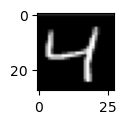

In [32]:
# 1. Load the image in grayscale
image = cv2.imread('Four.png', 0)
image = cv2.resize(image, (28,28))

plt.figure(figsize=(1,1))
plt.imshow(image, cmap = 'gray');

print(image.size, image.shape)

In [33]:
image = image / 255
image = image.reshape(1,28,28)
result = model.predict(image)
np.argmax(result)

1/1 [==============================] - 0s 126ms/step


4